In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "Dataset/Train/Train/Healthy"
train_files_powdery = "Dataset/Train/Train/Powdery"
train_files_rust = "Dataset/Train/Train/Rust"
train_files_gemini = "Dataset/Train/Train/Gemini"
train_files_leafcurl = "Dataset/Train/Train/Leaf_curl"
train_files_leafspot = "Dataset/Train/Train/Leaf_spot"
train_files_anthracnose = "Dataset/Train/Train/Anthracnose"

test_files_healthy = "Dataset/Test/Test/Healthy"
test_files_powdery = "Dataset/Test/Test/Powdery"
test_files_rust = "Dataset/Test/Test/Rust"
test_files_gemini = "Dataset/Test/Test/Gemini"
test_files_leafcurl = "Dataset/Test/Test/Leaf_curl"
test_files_leafspot = "Dataset/Test/Test/Leaf_spot"
test_files_anthracnose = "Dataset/Test/Test/Anthracnose"

valid_files_healthy = "Dataset/Validation/Validation/Healthy"
valid_files_powdery = "Dataset/Validation/Validation/Powdery"
valid_files_rust = "Dataset/Validation/Validation/Rust"
valid_files_gemini = "Dataset/Validation/Validation/Gemini"
valid_files_leafcurl = "Dataset/Validation/Validation/Leaf_curl"
valid_files_leafspot = "Dataset/Validation/Validation/Leaf_spot"
valid_files_anthracnose = "Dataset/Validation/Validation/Anthracnose"

print("Number of healthy leaf images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Healthy'))
print("Number of powder leaf images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Powdery'))
print("Number of rusty leaf images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Rust'))
print("Number of gemini leaf images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Gemini'))
print("Number of leaf curl images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Leaf_curl'))
print("Number of leaf spot images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Leaf_spot'))
print("Number of Anthracnose images in training set", total_files('/content/drive/MyDrive/Dataset/Train/Train/Anthracnose'))

print("========================================================")

print("Number of healthy leaf images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Healthy'))
print("Number of powder leaf images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Powdery'))
print("Number of rusty leaf images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Rust'))
print("Number of gemini leaf images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Gemini'))
print("Number of leaf curl images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Leaf_curl'))
print("Number of leaf spot images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Leaf_spot'))
print("Number of Anthracnose images in test set", total_files('/content/drive/MyDrive/Dataset/Test/Test/Anthracnose'))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Healthy'))
print("Number of powder leaf images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Powdery'))
print("Number of rusty leaf images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Rust'))
print("Number of gemini leaf images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Gemini'))
print("Number of leaf curl images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Leaf_curl'))
print("Number of leaf spot images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Leaf_spot'))
print("Number of Anthracnose images in validation set", total_files('/content/drive/MyDrive/Dataset/Validation/Validation/Anthracnose'))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of gemini leaf images in training set 277
Number of leaf curl images in training set 468
Number of leaf spot images in training set 460
Number of Anthracnose images in training set 480
Number of healthy leaf images in test set 39
Number of powder leaf images in test set 29
Number of rusty leaf images in test set 32
Number of gemini leaf images in test set 20
Number of leaf curl images in test set 43
Number of leaf spot images in test set 46
Number of Anthracnose images in test set 45
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20
Number of gemini leaf images in validation set 20
Number of leaf curl images in validation set 20
Number of leaf spot images in validation set 50
Number of Anthracnose images in validation set 66


In [3]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/Dataset/Train/Train/Gemini/IMG20231003171422 - Copy.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

Output hidden; open in https://colab.research.google.com to view.

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 3007 images belonging to 7 classes.
Found 216 images belonging to 7 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=1,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)





150/150 [==============================] - 1413s 9s/step - loss: 1.6136 - accuracy: 0.4664 - val_loss: 9.3333 - val_accuracy: 0.1900


In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
files.download('model.h5')'''

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Define test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Test/Test',
    target_size=(225, 225),
    batch_size=20,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


Found 254 images belonging to 7 classes.
13/13 [==============================] - 89s 7s/step - loss: 8.5665 - accuracy: 0.1575
Test Accuracy: 0.15748031437397003


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (7, 7), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
history = model.fit(train_generator,
                    batch_size=20,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=20
                    )

Epoch 1/20
151/151 [==============================] - 2175s 14s/step - loss: 1.0047 - accuracy: 0.6492 - val_loss: 0.3544 - val_accuracy: 0.8704
Epoch 2/20
151/151 [==============================] - 221s 1s/step - loss: 0.6584 - accuracy: 0.7582 - val_loss: 0.3590 - val_accuracy: 0.8611
Epoch 3/20
151/151 [==============================] - 217s 1s/step - loss: 0.4813 - accuracy: 0.8098 - val_loss: 0.3928 - val_accuracy: 0.8519
Epoch 4/20
151/151 [==============================] - 219s 1s/step - loss: 0.5697 - accuracy: 0.8011 - val_loss: 0.8137 - val_accuracy: 0.8056
Epoch 5/20
151/151 [==============================] - 214s 1s/step - loss: 0.4840 - accuracy: 0.8221 - val_loss: 0.2588 - val_accuracy: 0.9213
Epoch 6/20
151/151 [==============================] - 205s 1s/step - loss: 0.3636 - accuracy: 0.8726 - val_loss: 0.3126 - val_accuracy: 0.9167
Epoch 7/20
151/151 [==============================] - 220s 1s/step - loss: 0.3211 - accuracy: 0.8883 - val_loss: 0.3080 - val_accuracy: 0.88

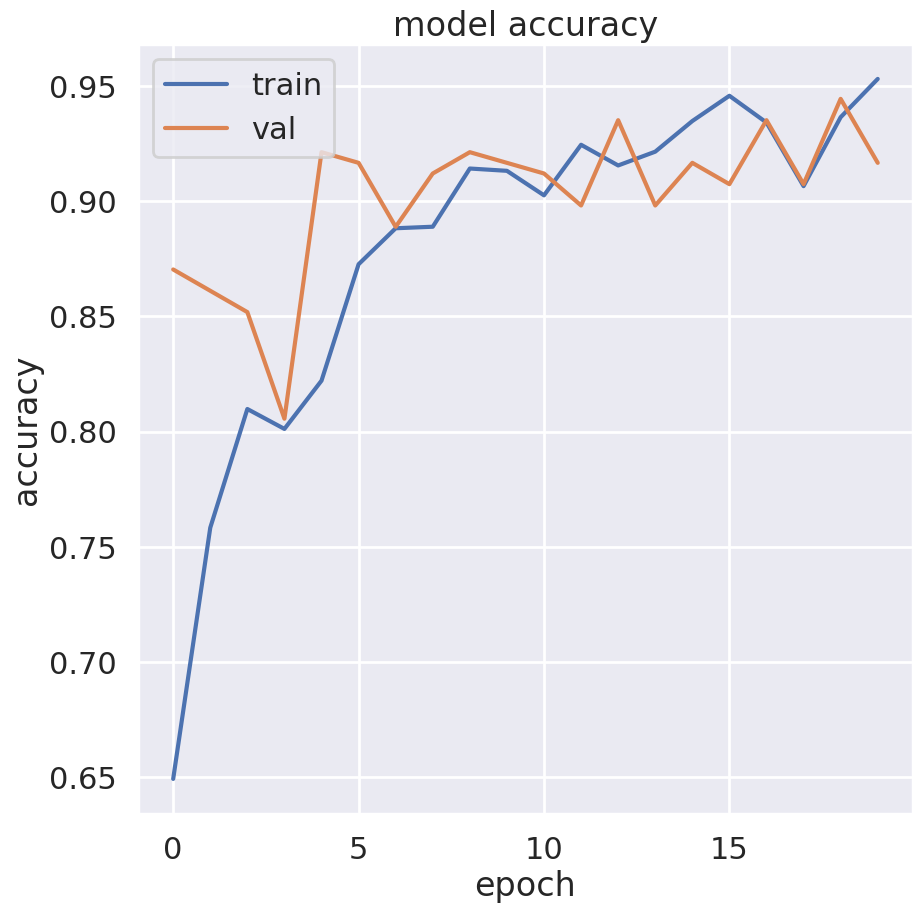

In [10]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(10,10), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
model.save("model.h5")
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
files.download('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/Dataset/Test/Test/l2.png')

In [74]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 26ms/step


array([3.2979371e-03, 1.3583399e-01, 3.8622851e-03, 1.2485278e-07,
       1.7262891e-01, 5.9693982e-03, 6.7840743e-01], dtype=float32)

In [75]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Anthracnose',
 1: 'Gemini',
 2: 'Healthy',
 3: 'Leaf_curl',
 4: 'Leaf_spot',
 5: 'Powdery',
 6: 'Rust'}

In [76]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
